# Classification

In [4]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, plot_confusion_matrix, get_scorer
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, LeaveOneOut


from sklearn.neighbors import KNeighborsClassifier, K
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!conda install pandas-profiling -y
from pandas_profiling import ProfileReport

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [8]:
%matplotlib inline

In [2]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [ ]:
ProfileReport(pd.concat([X,y]))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [6]:
def evalCandidate(model, X_train, y_train, X_test = None, y_test = None, metric='accuracy', cv= LeaveOneOut()):
    print(type(model).__name__)
    scores = cross_validate(model, X_train, y_train, scoring=metric, return_estimator=True, return_train_score=True, cv=cv)
    best_estimator = scores["estimator"][np.argmax(scores["test_score"])]
    del scores["estimator"]
    scores = pd.DataFrame(scores)
    if X_test is not None and y_test is not None:
        scorer = get_scorer(metric)
        y_pred = best_estimator.predict(X_test)
        scores["hold-out scores"] = scorer(best_estimator, X_test, y_test)
        report = classification_report(y_test, y_pred)
        confusion_matrix = plot_confusion_matrix(best_estimator, X_test, y_test)
    else:
        report = None
        confusion_matrix = plot_confusion_matrix(best_estimator, X_train, y_train)
    return scores.describe().iloc[1:3, 2:], report, confusion_matrix

Due to the small dataset size, leave one out cv is done to provide a more robust measure of model performance.

### KNN

KNeighborsClassifier


,test_score,train_score,hold-out scores
mean,0.950000,0.950420,1.0
std,0.218859,0.003678,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



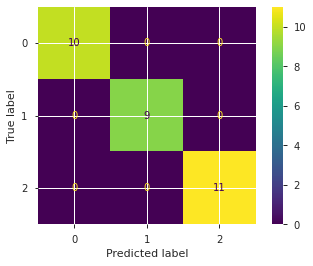

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
scores, report, confusion_matrix = evalCandidate(knn, X_train, y_train, X_test, y_test)

display(scores)
print(report)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=n_neighbors, param_range=range(1, 10) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


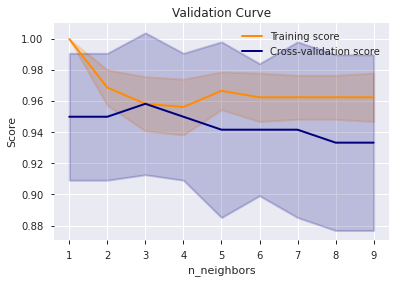

In [10]:
param_range = range(1, 10)
train_scores, test_scores = validation_curve(knn, X_train, y_train, 'n_neighbors', param_range, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### Naive Bayes

GaussianNB


,test_score,train_score,hold-out scores
mean,0.941667,0.949160,1.0
std,0.235355,0.002635,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



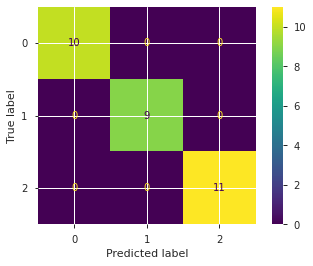

In [11]:
nb = GaussianNB()
scores, report, confusion_matrix = evalCandidate(nb, X_train, y_train, X_test, y_test)

display(scores)
print(report)

### Logistic Regression


LogisticRegression


,test_score,train_score,hold-out scores
mean,0.966667,0.973669,1.0
std,0.180258,0.003256,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



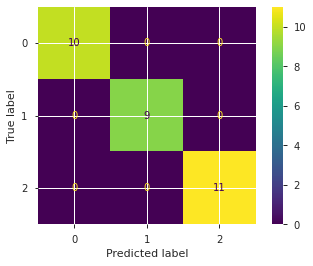

In [12]:
lr = LogisticRegression(solver='newton-cg')
scores, report, confusion_matrix = evalCandidate(lr, X_train, y_train, X_test, y_test)

display(scores)
print(report)

Logistic Regression appears to overfit slightly, however it performs better on the CV set as compared to the previous models

### Classification Tree

DecisionTreeClassifier


,test_score,train_score,hold-out scores
mean,0.916667,1.0,1.0
std,0.277544,0.0,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



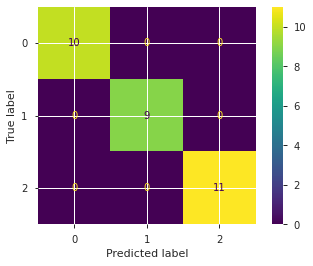

In [13]:
cart = DecisionTreeClassifier()
scores, report, confusion_matrix = evalCandidate(cart, X_train, y_train, X_test, y_test)

display(scores)
print(report)


The Decision Tree exhibits low bias, but suffers from overfitting.

### Support Vector Machine

SVC


,test_score,train_score,hold-out scores
mean,0.950000,0.973039,1.0
std,0.218859,0.003757,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



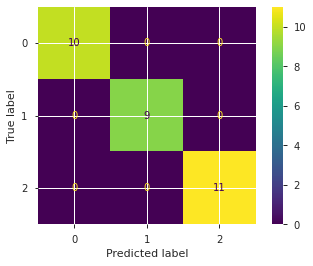

In [14]:
svm = SVC()
scores, report, confusion_matrix = evalCandidate(svm, X_train, y_train, X_test, y_test)

display(scores)
print(report)


## Blood Transfusion Dataset

In [15]:
blood_df = pd.read_csv("transfusion.data")
blood_df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [16]:
X, y = blood_df.iloc[:, :-1], blood_df.iloc[:, -1]

In [ ]:
ProfileReport(blood_df)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogisticRegression


,test_score,train_score,hold-out scores
mean,0.777633,0.778852,0.753333
std,0.018607,0.010767,0.000000


              precision    recall  f1-score   support

           0       0.76      0.97      0.86       113
           1       0.50      0.08      0.14        37

    accuracy                           0.75       150
   macro avg       0.63      0.53      0.50       150
weighted avg       0.70      0.75      0.68       150



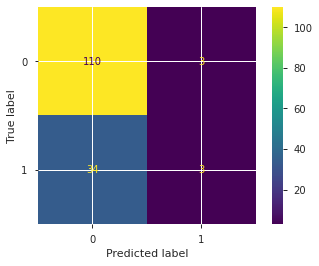

In [19]:
lr = LogisticRegression()
scores, report, confusion_matrix = evalCandidate(lr, X_train, y_train, X_test, y_test, cv = 5)

display(scores)
print(report)

DecisionTreeClassifier


,test_score,train_score,hold-out scores
mean,0.745826,0.943985,0.74
std,0.021654,0.009364,0.00


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       113
           1       0.46      0.32      0.38        37

    accuracy                           0.74       150
   macro avg       0.63      0.60      0.61       150
weighted avg       0.72      0.74      0.72       150



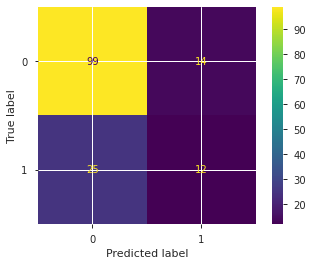

In [20]:
dt = DecisionTreeClassifier()
scores, report, confusion_matrix = evalCandidate(dt, X_train, y_train, X_test, y_test, cv = 5)

display(scores)
print(report)

SVC


,test_score,train_score,hold-out scores
mean,0.780938,0.793484,0.766667
std,0.022315,0.007405,0.000000


              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.62      0.14      0.22        37

    accuracy                           0.77       150
   macro avg       0.70      0.55      0.54       150
weighted avg       0.74      0.77      0.70       150



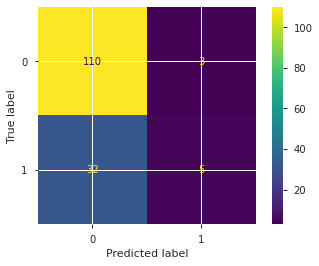

In [21]:
svm = SVC()
scores, report, confusion_matrix = evalCandidate(svm, X_train, y_train, X_test, y_test, cv = 5)

display(scores)
print(report)

## Regression

In [75]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [31]:
boston = load_boston()
print(boston.keys())
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["Price"])
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [33]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [34]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

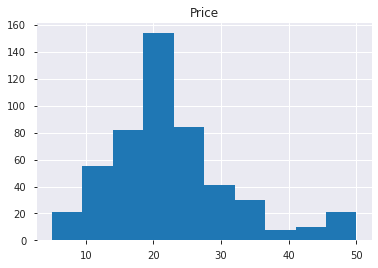

In [36]:
y.hist()

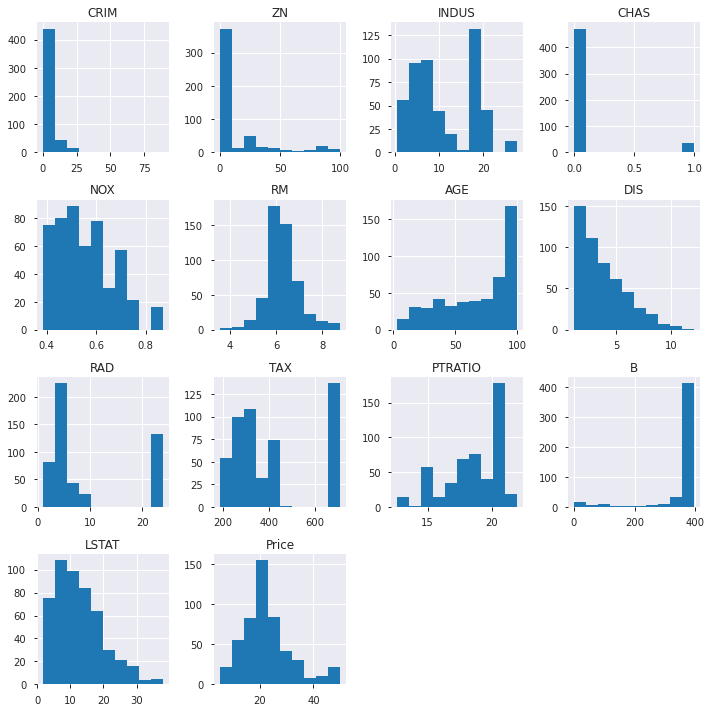

In [86]:
boston_df = pd.concat([X, y], axis = 1)
boston_df.hist(figsize=(10, 10))
plt.tight_layout()

<AxesSubplot:>

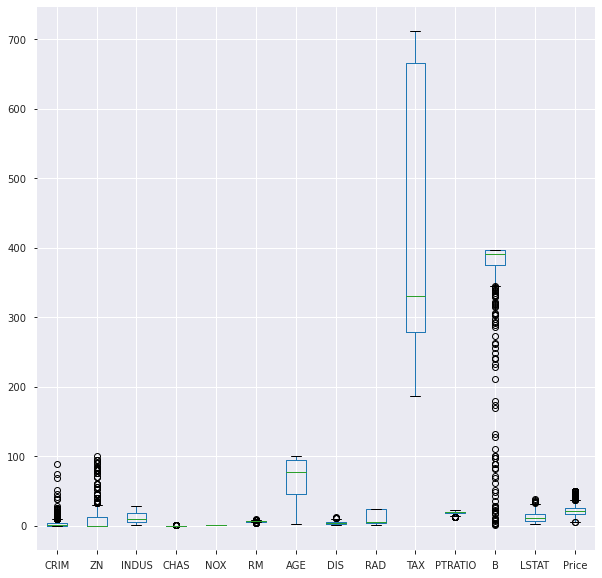

In [110]:
boston_df.plot(kind='box', figsize=(10, 10))

<AxesSubplot:>

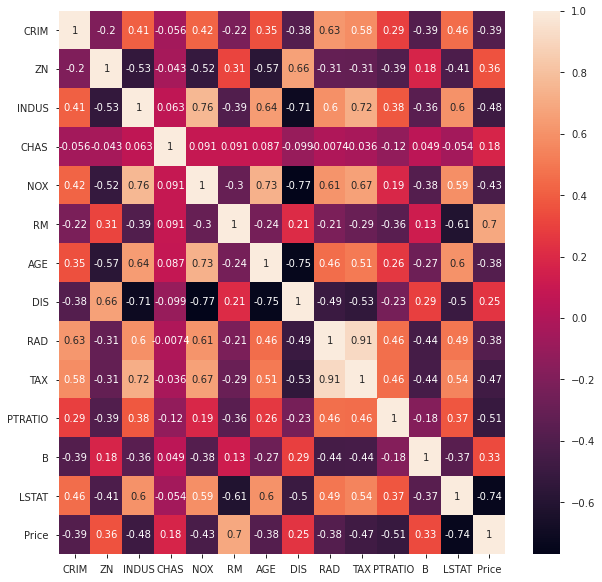

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(boston_df.corr(), annot=True, ax = ax)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle=True,random_state = 42)

In [97]:
def evalCandidateModel(model, X_train, X_test, y_train, y_test, scoring = 'neg_root_mean_squared_error', cv = LeaveOneOut()):
    scores = cross_validate(model, X_train, y_train, scoring=scoring, return_estimator=True, return_train_score=True, cv=cv, n_jobs=-1)
    best_estimator = scores["estimator"][np.argmax(scores["test_score"])]
    del scores["estimator"]
    scores = pd.DataFrame(scores)
      # If a hold out set is provided
    if X_test is not None and y_test is not None:
        scorer = get_scorer(scoring) # Then also score it, based off the scoring scheme provided
        scores["hold_out_score"] = scorer(best_estimator, X_test, y_test)
    return scores.describe().iloc[1:3, 2:].round(5), model
def evalHistory(new_score, model_name,history = None):
    if history is None:
        history = pd.DataFrame()
    score_df =new_score.iloc[0, :]
    score_df["test_std"] = new_score.iloc[1, 0]
    score_df.rename(index=model_name, inplace=True)
    history = history.append(score_df)
    return history


In [98]:
data_preprocessing = Pipeline([
    ('Standardization', StandardScaler())
])

knn_reg = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('KNN', KNeighborsRegressor(n_neighbors=5))
])
scores, knn_reg = evalCandidateModel(knn_reg, X_train, X_test, y_train, y_test)
history = evalHistory(scores, 'KNN (k=5)')

In [99]:
scores

,test_score,train_score,hold_out_score
mean,-2.94927,-3.51884,-2.81317
std,3.62094,0.01633,0.00000


KNN with k=5 suffers from high variance, as the CV score is much lower than the training score.

In [100]:
lr = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Linear Regression', LinearRegression())
])
scores, lr = evalCandidateModel(lr, X_train, X_test, y_train, y_test)
history = evalHistory(scores, 'Linear Regression', history)
scores

,test_score,train_score,hold_out_score
mean,-3.48747,-4.76814,-3.87245
std,3.56256,0.01470,0.00000


A linear regression model appears to suffer from both high bias and variance.

In [101]:
data_preprocessing_poly = Pipeline([
    ('Polynomial Features', PolynomialFeatures(degree=2)),
    ('Standardization', StandardScaler())
])

poly_reg = Pipeline([
    ('Data Preprocessing', data_preprocessing_poly),
    ('Polynomial Regression', LinearRegression())
])
scores, poly_reg = evalCandidateModel(poly_reg, X_train, X_test, y_train, y_test)
history = evalHistory(scores, 'Polynomial Regression (Degree 2)', history)
scores

,test_score,train_score,hold_out_score
mean,-2.58720,-2.43819,-2.95916
std,3.07488,0.02044,0.00000


Adding extra terms helps to reduce the bias of the model, but the model heavily overfits.

In [102]:
poly_reg_l2 = Pipeline([
    ('Data Preprocessing', data_preprocessing_poly),
    ('Regularized Polynomial Regression', RidgeCV())
])
scores, poly_reg_l2 = evalCandidateModel(poly_reg_l2, X_train, X_test, y_train, y_test)
history = evalHistory(scores, 'Regularized (L2) Polynomial Regression (Degree 2)', history)
scores

,test_score,train_score,hold_out_score
mean,-2.47051,-2.76649,-2.72674
std,2.81933,0.02042,0.00000


In [103]:
rf = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Random Forests', RandomForestRegressor(random_state = 42))
])
scores, rf = evalCandidateModel(rf, X_train, X_test, y_train, y_test)
history = evalHistory(scores, 'Random Forests', history)
scores

,test_score,train_score,hold_out_score
mean,-2.24191,-1.25453,-3.09143
std,2.43549,0.02878,0.00000


In [104]:
gbm = Pipeline([
    ('Data Preprocessing', data_preprocessing),
    ('Gradient Boosting', GradientBoostingRegressor(random_state = 42))
])
scores, rf = evalCandidateModel(gbm, X_train, X_test, y_train, y_test)
history = evalHistory(scores, 'Gradient Boosting', history)
scores

,test_score,train_score,hold_out_score
mean,-2.20819,-1.41600,-2.19086
std,2.29508,0.01934,0.00000


Gradient Boosting appears to perform the best, with a RMSE of 2.20 on the dev set.

In [106]:
history.sort_values(['test_score', 'test_std', 'hold_out_score', 'train_score'], ascending=[False, True, False, False])

,hold_out_score,test_score,test_std,train_score
Gradient Boosting,-2.19086,-2.20819,2.29508,-1.41600
Random Forests,-3.09143,-2.24191,2.43549,-1.25453
Regularized (L2) Polynomial Regression (Degree 2),-2.72674,-2.47051,2.81933,-2.76649
Polynomial Regression (Degree 2),-2.95916,-2.58720,3.07488,-2.43819
KNN (k=5),-2.81317,-2.94927,3.62094,-3.51884
Linear Regression,-3.87245,-3.48747,3.56256,-4.76814
